<a href="https://colab.research.google.com/github/ArchitLimaye/OIBSIP/blob/main/Oasis_Infobyte_%7C_Data_Scientist_%7C_Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Task 5**
Sales prediction means predicting how much of a product people will buy based on factors
 such as the amount you spend to advertise your product, the segment of people you
 advertise for, or the platform you are advertising on about your product.
 Typically, a product and service-based business always need their Data Scientist to predict
 their future sales with every step they take to manipulate the cost of advertising their
 product. So let’s start the task of sales prediction with machine learning using Python.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df=pd.read_csv("/content/Advertising.csv")
df.sample(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
115,116,75.1,35.0,52.7,12.6
157,158,149.8,1.3,24.3,10.1
93,94,250.9,36.5,72.3,22.2
41,42,177.0,33.4,38.7,17.1
57,58,136.2,19.2,16.6,13.2


In [54]:
df=df.drop(columns="Unnamed: 0")
df.sample(5)

,TV,Radio,Newspaper,Sales
54,262.7,28.8,15.9,20.2
144,96.2,14.8,38.9,11.4
77,120.5,28.5,14.2,14.2
17,281.4,39.6,55.8,24.4
135,48.3,47.0,8.5,11.6


In [55]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [56]:
df.duplicated().sum()

0

In [57]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<Axes: >

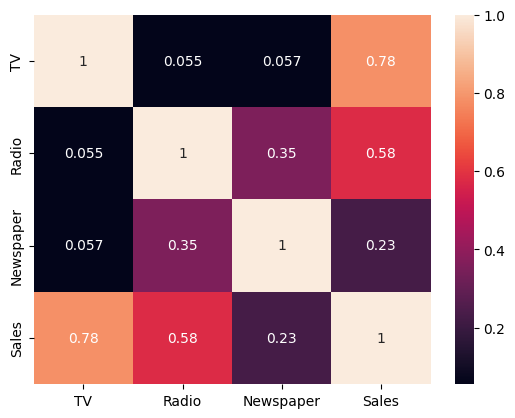

In [58]:
sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, 'TV Distribution')

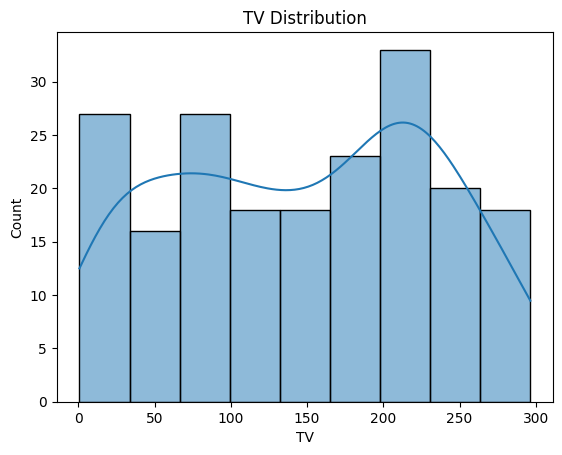

In [59]:
sns.histplot(df["TV"],kde=True)
plt.title("TV Distribution")

Text(0.5, 1.0, 'Radio Distribution')

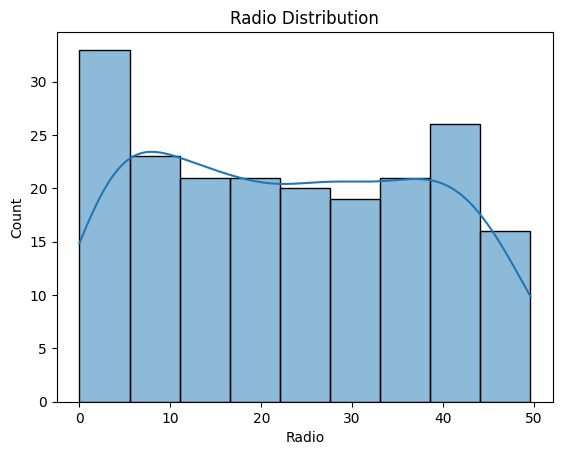

In [60]:
sns.histplot(df["Radio"],kde=True)
plt.title("Radio Distribution")

Text(0.5, 1.0, 'Newspaper Distribution')

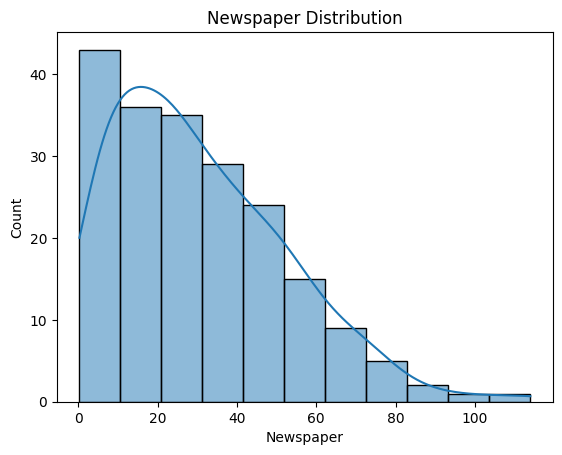

In [61]:
sns.histplot(df["Newspaper"],kde=True)
plt.title("Newspaper Distribution")

Text(0.5, 1.0, 'Sales Distribution')

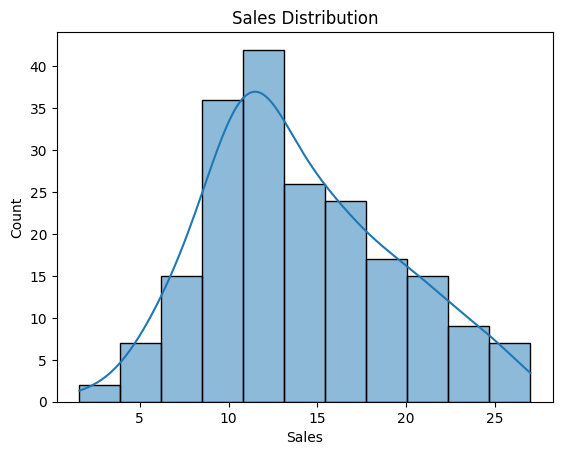

In [62]:
sns.histplot(df["Sales"],kde=True)
plt.title("Sales Distribution")

In [63]:
x=df.drop(columns="Sales")
y=df["Sales"]

In [66]:
from sklearn.preprocessing import StandardScaler
pre=StandardScaler()
x=pre.fit_transform(x)

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=70)

In [90]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,random_state=70)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=70)

In [91]:
pred=model.predict(x_test)
rmse=root_mean_squared_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
r2=r2_score(pred,y_test)
rmse=root_mean_squared_error(pred,y_test)
print("Metrics for Linear regression\n","MSE=",mse,"\nR2 score:",r2,"\nRMSE:",rmse)

Metrics for Linear regression
 MSE= 0.4416459249999972 
R2 score: 0.9835769015952498 
RMSE: 0.6645644626369944
